In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
filepath = ('/Users/shijizhao/Documents/UCI/Courses/'
            'Intro to Data Science/Final Project/'
            'csv_hpa_2012_2016/ss16hpa_clean.csv')

df = pd.read_csv(filepath)

In [3]:
df.loc[df['TEN']==1,'TEN']='Mortgage/Loan'
df.loc[df['TEN']==2,'TEN']='Clear'

In [4]:
#for var in ['ACR','BATH','BLD','FS','HFL',
#            'REFR','RWAT','RWATPR','SINK','STOV','TEN','TOIL','VEH',
#            'YBL','FES','FPARC','HHL','HHT','HUGCL','HUPAC','HUPAOC',
#            'HUPARC','KIT','LNGI','MULTG','MV','NPP','NR','PARTNER','PLM',
#            'PSF','R18','R60','R65','RESMODE','TAXP','WIF','WKEXREL','WORKSTAT']:
#    df[var]=df[var].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191909 entries, 0 to 191908
Data columns (total 53 columns):
NP          191909 non-null int64
ACR         191909 non-null float64
BATH        191909 non-null float64
BDSP        191909 non-null float64
BLD         191909 non-null float64
CONP        191909 non-null float64
ELEP        191909 non-null float64
FS          191909 non-null float64
FULP        191909 non-null float64
GASP        191909 non-null float64
HFL         191909 non-null float64
INSP        191909 non-null float64
REFR        191909 non-null float64
RMSP        191909 non-null float64
RWAT        191909 non-null float64
RWATPR      191909 non-null float64
SINK        191909 non-null float64
STOV        191909 non-null float64
TEN         191909 non-null object
TOIL        191909 non-null float64
VALP        191909 non-null float64
VEH         191909 non-null float64
WATP        191909 non-null float64
YBL         191909 non-null float64
FES         191909 non-null 

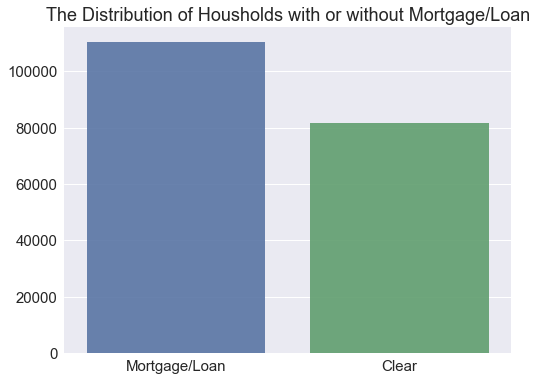

Mortgage/Loan    110359
Clear             81550
Name: TEN, dtype: int64


In [6]:
plt.figure(figsize=(8,6))

sns.set(font_scale=1.5)
sns.barplot(df['TEN'].value_counts().index, df['TEN'].value_counts().values, alpha=0.9)
plt.title('The Distribution of Housholds with or without Mortgage/Loan')
plt.show()

print(df['TEN'].value_counts())

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specify the data
cols = [col for col in df.columns if col not in ['TEN']]
X=df[cols]

# Specify the target labels and flatten the array 
y=df['TEN']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X_train.head()

,NP,ACR,BATH,BDSP,BLD,CONP,ELEP,FS,FULP,GASP,...,PLM,PSF,R18,R60,R65,RESMODE,TAXP,WIF,WKEXREL,WORKSTAT
23558,1,0.0,1.0,1.0,4.0,0.0,30.0,2.0,2.0,80.0,...,1.0,0.0,0.0,1.0,1.0,1.0,51.0,-1.0,-1.0,-1.0
60729,2,3.0,1.0,5.0,2.0,0.0,110.0,2.0,2.0,3.0,...,1.0,0.0,0.0,2.0,2.0,3.0,30.0,2.0,4.0,3.0
156427,2,1.0,1.0,3.0,2.0,0.0,80.0,2.0,200.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,47.0,-1.0,-1.0,-1.0
114139,5,1.0,1.0,4.0,2.0,0.0,110.0,2.0,2.0,80.0,...,1.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,1.0,1.0
117477,2,1.0,1.0,2.0,2.0,0.0,220.0,2.0,1200.0,3.0,...,1.0,0.0,0.0,0.0,0.0,3.0,37.0,2.0,2.0,1.0


In [9]:
y_train.head()

23558             Clear
60729     Mortgage/Loan
156427    Mortgage/Loan
114139    Mortgage/Loan
117477    Mortgage/Loan
Name: TEN, dtype: object

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

#create an object of the type Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)

#train the algorithm on training data and predict using the testing data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Decision Tree confusion matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Decision Tree accuracy : ")
print(accuracy_score(y_test, y_pred, normalize = True))
print()
print("Decision Tree metrics report : ")
print(classification_report(y_test, y_pred))

Decision Tree confusion matrix : 
[[13178  7163]
 [ 4929 22708]]

Decision Tree accuracy : 
0.7479678185835175

Decision Tree metrics report : 
               precision    recall  f1-score   support

        Clear       0.73      0.65      0.69     20341
Mortgage/Loan       0.76      0.82      0.79     27637

    micro avg       0.75      0.75      0.75     47978
    macro avg       0.74      0.73      0.74     47978
 weighted avg       0.75      0.75      0.75     47978



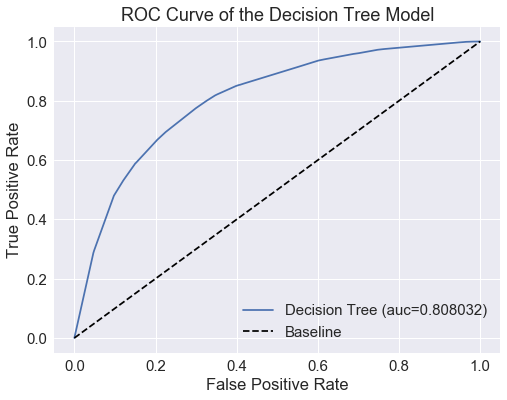

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1], pos_label='Mortgage/Loan')
auc = roc_auc_score(y_test, y_proba[:,1])

sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, fpr, fpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Decision Tree Model')
plt.legend(['Decision Tree (auc=%f)'%auc,'Baseline'])
plt.show()

/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


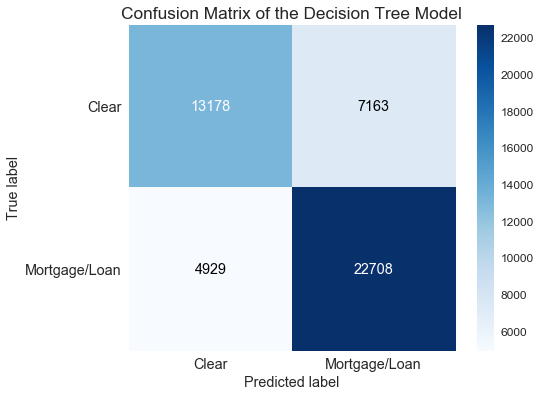

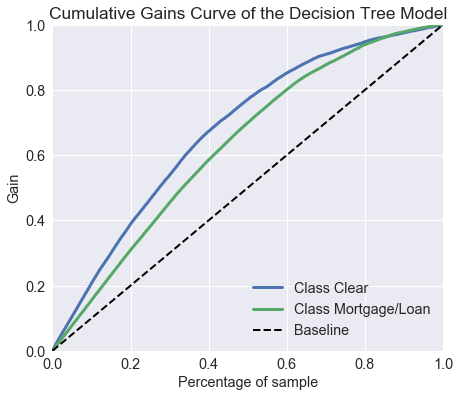

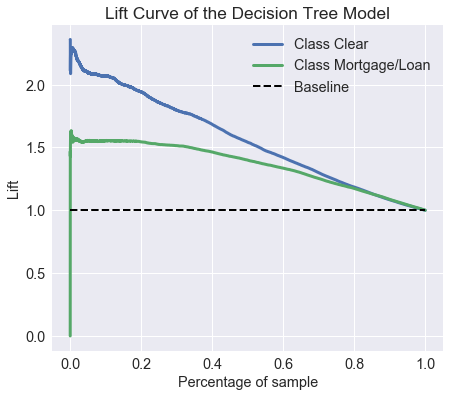

In [13]:
import scikitplot as skplt

sns.set(font_scale=1.2)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,6),title='Confusion Matrix of the Decision Tree Model')
skplt.metrics.plot_cumulative_gain(y_test, y_proba,figsize=(7,6),title='Cumulative Gains Curve of the Decision Tree Model')
skplt.metrics.plot_lift_curve(y_test, y_proba,figsize=(7,6),title='Lift Curve of the Decision Tree Model')
plt.legend(loc='best',fontsize='medium')
plt.show()

In [14]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=cols,
                           class_names=df['TEN'],
                           label=False, impurity=False,
                           rounded=True, filled=True,
                           special_characters=True)  
graph = graphviz.Source(dot_data)

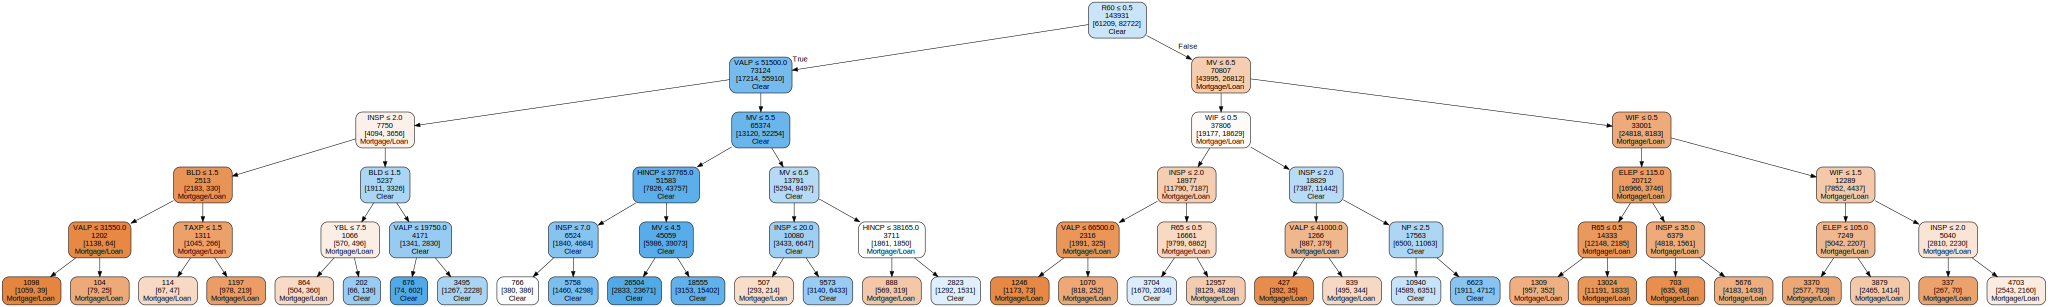

In [25]:
graph

For the next two classifiers, scale the data first.

In [16]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

label_list = ['NP','ACR','BATH','BDSP','BLD','CONP','ELEP','FS','FULP','GASP','HFL',
              'INSP','REFR','RMSP','RWAT','RWATPR','SINK','STOV','TOIL','VALP','VEH',
              'WATP','YBL','FES','FPARC','HHL','HHT','HINCP','HUGCL','HUPAC','HUPAOC',
              'HUPARC','KIT','LNGI','MULTG','MV','NOC','NPF','NPP','NR','NRC','PARTNER','PLM',
              'PSF','R18','R60','R65','RESMODE','TAXP','WIF','WKEXREL','WORKSTAT']

X_train=pd.DataFrame(X_train, columns=label_list)
X_train.head()

/Users/shijizhao/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,NP,ACR,BATH,BDSP,BLD,CONP,ELEP,FS,FULP,GASP,...,PLM,PSF,R18,R60,R65,RESMODE,TAXP,WIF,WKEXREL,WORKSTAT
0,-1.095793,-2.103899,-0.044149,-2.178523,2.356726,-0.129531,-1.188375,0.254912,-0.508942,0.220612,...,-0.058026,-0.163446,-0.593230,0.339450,0.654584,-1.001077,0.877205,-1.352146,-1.036603,-0.947965
1,-0.343760,2.516006,-0.044149,1.882478,-0.226470,-0.129531,-0.322040,0.254912,-0.508942,-0.686697,...,-0.058026,-0.163446,-0.593230,1.567363,2.007023,1.222095,-0.312983,0.849854,0.026546,-0.103033
2,-0.343760,-0.563931,-0.044149,-0.148023,-0.226470,-0.129531,-0.646915,0.254912,-0.295724,-0.686697,...,-0.058026,-0.163446,-0.593230,-0.888462,-0.697855,-1.001077,0.650502,-1.352146,-1.036603,-0.947965
3,1.912338,-0.563931,-0.044149,0.867228,-0.226470,-0.129531,-0.322040,0.254912,-0.508942,0.220612,...,-0.058026,-0.163446,1.685687,-0.888462,-0.697855,1.222095,-1.843223,0.849854,-0.611343,-0.525499
4,-0.343760,-0.563931,-0.044149,-1.163273,-0.226470,-0.129531,0.869171,0.254912,0.781130,-0.686697,...,-0.058026,-0.163446,-0.593230,-0.888462,-0.697855,1.222095,0.083746,0.849854,-0.398714,-0.525499


## Gaussian Naive Bayes Model

Note: Some of the features in our data might not be Gaussian distributed. The Gaussian Naive Bayes is an approximate estimation.

In [17]:
from sklearn.naive_bayes import GaussianNB

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Naive-Bayes confusion matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Naive-Bayes accuracy : ")
print(accuracy_score(y_test, y_pred, normalize = True))
print()
print("Naive-Bayes metrics report : ")
print(classification_report(y_test, y_pred))

Naive-Bayes confusion matrix : 
[[16246  4095]
 [11832 15805]]

Naive-Bayes accuracy : 
0.6680353495352036

Naive-Bayes metrics report : 
               precision    recall  f1-score   support

        Clear       0.58      0.80      0.67     20341
Mortgage/Loan       0.79      0.57      0.66     27637

    micro avg       0.67      0.67      0.67     47978
    macro avg       0.69      0.69      0.67     47978
 weighted avg       0.70      0.67      0.67     47978



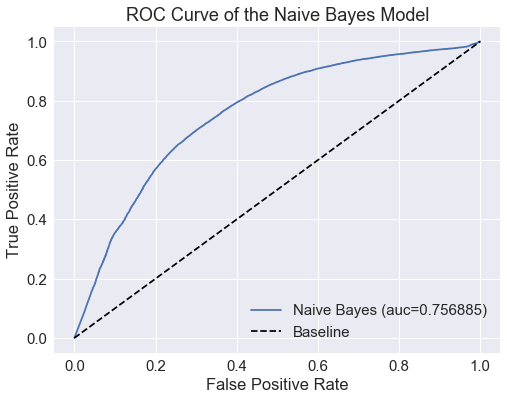

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1], pos_label='Mortgage/Loan')
auc = roc_auc_score(y_test, y_proba[:,1])

sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, fpr, fpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Naive Bayes Model')
plt.legend(['Naive Bayes (auc=%f)'%auc,'Baseline'])
plt.show()

/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


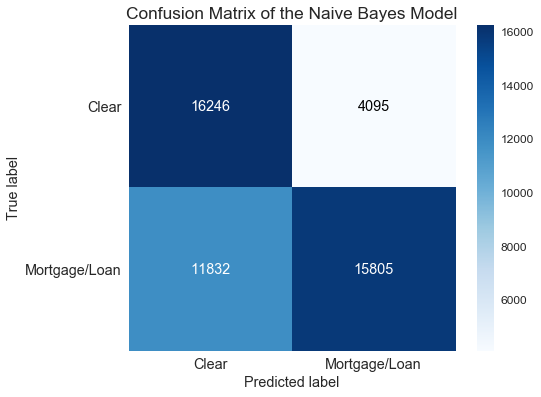

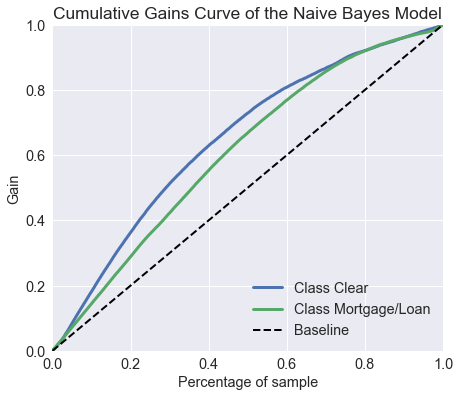

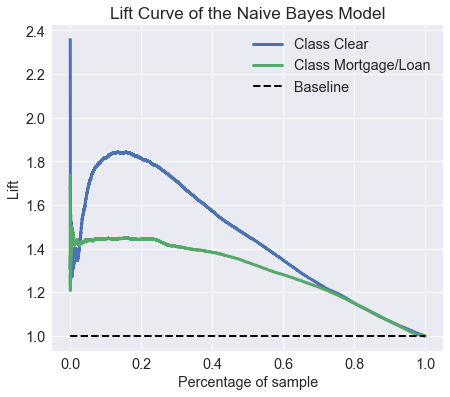

In [20]:
import scikitplot as skplt

sns.set(font_scale=1.2)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,6),title='Confusion Matrix of the Naive Bayes Model')
skplt.metrics.plot_cumulative_gain(y_test, y_proba,figsize=(7,6),title='Cumulative Gains Curve of the Naive Bayes Model')
skplt.metrics.plot_lift_curve(y_test, y_proba,figsize=(7,6),title='Lift Curve of the Naive Bayes Model')
plt.legend(loc='best',fontsize='medium')
plt.show()

## Logistic Regression

In [21]:
from sklearn.linear_model import SGDClassifier

#create an object of the type GaussianNB
sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)

#train the algorithm on training data and predict using the testing data
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
y_proba = sgd.predict_proba(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Logistic Regession confusion matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Logistic Regession accuracy : ")
print(accuracy_score(y_test, y_pred, normalize = True))
print()
print("Logistic Regession report : ")
print(classification_report(y_test, y_pred))

Logistic Regession confusion matrix : 
[[13145  7196]
 [ 5780 21857]]

Logistic Regession accuracy : 
0.7295427070740756

Logistic Regession report : 
               precision    recall  f1-score   support

        Clear       0.69      0.65      0.67     20341
Mortgage/Loan       0.75      0.79      0.77     27637

    micro avg       0.73      0.73      0.73     47978
    macro avg       0.72      0.72      0.72     47978
 weighted avg       0.73      0.73      0.73     47978



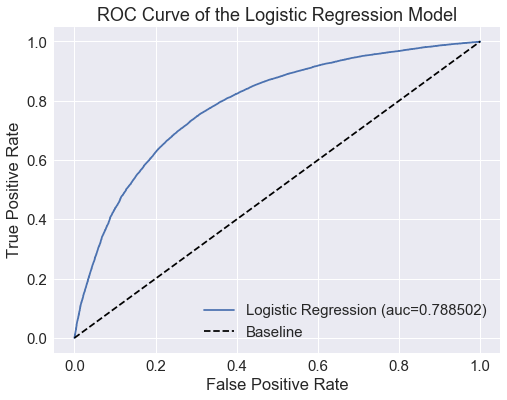

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1], pos_label='Mortgage/Loan')
auc = roc_auc_score(y_test, y_proba[:,1])

sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, fpr, fpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Logistic Regression Model')
plt.legend(['Logistic Regression (auc=%f)'%auc,'Baseline'])
plt.show()

/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


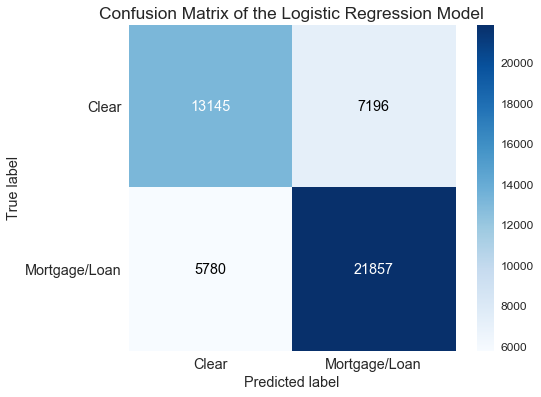

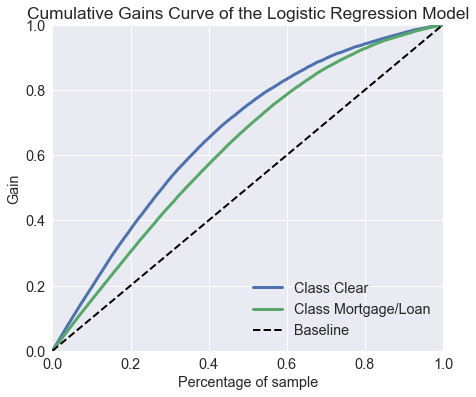

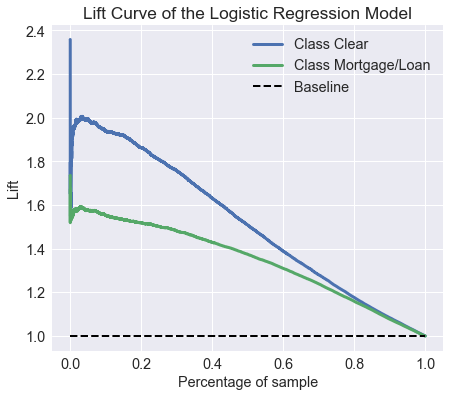

In [24]:
import scikitplot as skplt

sns.set(font_scale=1.2)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,6),title='Confusion Matrix of the Logistic Regression Model')
skplt.metrics.plot_cumulative_gain(y_test, y_proba,figsize=(7,6),title='Cumulative Gains Curve of the Logistic Regression Model')
skplt.metrics.plot_lift_curve(y_test, y_proba,figsize=(7,6),title='Lift Curve of the Logistic Regression Model')
plt.legend(loc='best',fontsize='medium')
plt.show()